# basics

In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread,imshow
import matplotlib.pyplot as plt

In [2]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape,order='F')

In [3]:
df_enc = pd.read_csv("../train.csv")

In [4]:
df_enc.head(8)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...


In [5]:
from pathlib import Path

In [6]:
trn = Path('../train')
tst = Path('../test')

In [7]:
df_enc.Image_Label[0][:-5]

'0011165.jpg'

In [8]:
img = imread(trn/df_enc.Image_Label[0][:-5])

In [9]:
from skimage import io

In [10]:
from fractions import Fraction

In [11]:
img.shape

(1400, 2100, 3)

In [12]:
Fraction(256,1600)

Fraction(4, 25)

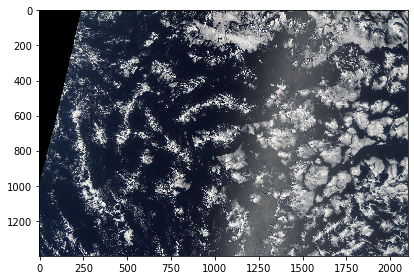

In [13]:
imshow(img)

## image and mask visualisations

In [27]:
def all_masks_on_pic(i):# i is a multiple of 4
    # read image
    _ = df_enc[df_enc.columns[0]][i]
    img = imread(trn/_.split('_')[0])
    # draw image
    fig,ax = plt.subplots(2,2,figsize=(14,10))
    # gen masks
    enc1 = df_enc[df_enc.columns[1]][i]
    enc2 = df_enc[df_enc.columns[1]][i+1]
    enc3 = df_enc[df_enc.columns[1]][i+2]
    enc4 = df_enc[df_enc.columns[1]][i+3]

    if not pd.isna(enc1):#Reds,fish
        print('fish')
        ax[0,0].imshow(img)
        msk1 = rle_decode(enc1,(1400,2100))
        msk1 = msk1.astype(np.float)
        msk1[np.where(msk1==0)] = np.nan
        ax[0,0].imshow(msk1,cmap='Reds',alpha=0.4,vmin=0,vmax=1)
        ax[0,0].set_title('fish')
    if not pd.isna(enc2):#Greens,flower
        print('flower')
        ax[0,1].imshow(img)
        msk2 = rle_decode(enc2,(1400,2100))
        msk2 = msk2.astype(np.float)
        msk2[np.where(msk2==0)] = np.nan
        ax[0,1].imshow(msk2,cmap='Greens',alpha=0.4,vmin=0,vmax=1)
        ax[0,1].set_title('flower')
    if not pd.isna(enc3):#Purples,gravel
        print('gravel')
        ax[1,0].imshow(img)
        msk3 = rle_decode(enc3,(1400,2100))
        msk3 = msk3.astype(np.float)
        msk3[np.where(msk3==0)] = np.nan
        ax[1,0].imshow(msk3,cmap='Purples',alpha=0.4,vmin=0,vmax=1)
        ax[1,0].set_title('gravel')
    if not pd.isna(enc4):#Oranges,sugar
        print('sugar')
        ax[1,1].imshow(img)
        msk4 = rle_decode(enc4,(1400,2100))
        msk4 = msk4.astype(np.float)
        msk4[np.where(msk4==0)] = np.nan
        ax[1,1].imshow(msk4,cmap='Oranges',alpha=0.4,vmin=0,vmax=1)
        ax[1,1].set_title('sugar')

# visualize

fish
sugar


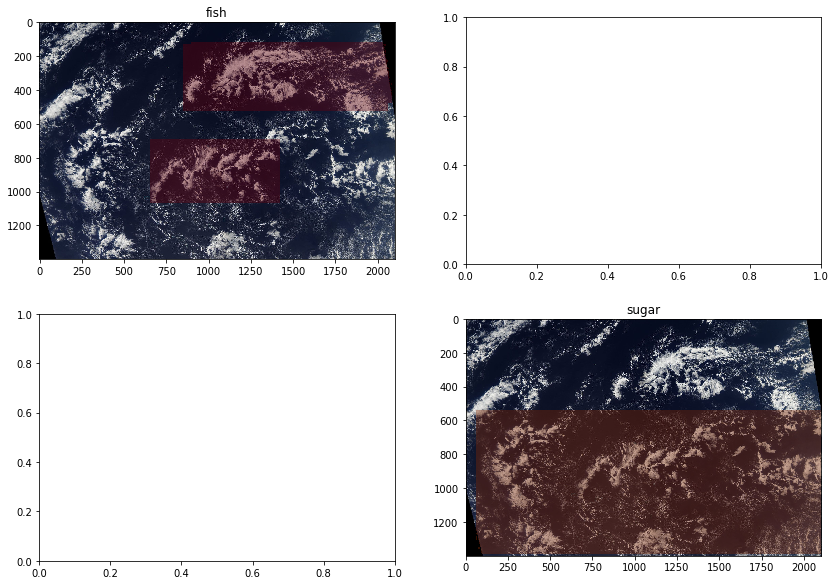

In [31]:
#red = fish, green = flower, blue = gravel, orange = sugar 
# 20, is weird
all_masks_on_pic(28)

In [20]:
#                                                                                                                                                                                                      